📊 Visualisasi Data BMW Sales 2010 - 2024

Mata Kuliah: Data Mining

Tujuan:
Menampilkan hasil eksplorasi dan visualisasi data sales penjualan BMW.


Langkah-langkah utama:

1. Import dataset dari Google Drive

2. Pembersihan data (cleansing)

3. Visualisasi persebaran dan tren data

4. Analisis hasil visualisasi

# **1. Setup & Import Library**

In [ ]:
# ================================================
# 📊 VISUALISASI DATA BMW SALES (2010-2024)
# ================================================

# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")



# **2. Import Dataset dari Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# import dataset dari collab yang sudah disimpan
file_path = "/content/drive/MyDrive/Colab Notebooks/BMW sales data (2010-2024).csv"

# baca ke DataFrame
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cek Dataset apakah sudah benar benar ter import

In [ ]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


# 3. Pembersihan Data (Data Cleansing / Preprocessing)

In [ ]:
##Cek apakah data yang null
df.isnull().sum()


,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


In [ ]:
##Checking duplicate apakah ada data yang duplicate dan menghilangkan data yang duplikat
df.duplicated().sum()
df = df.drop_duplicates()


# **4. Visualisasi Persebaran & Tren Data**

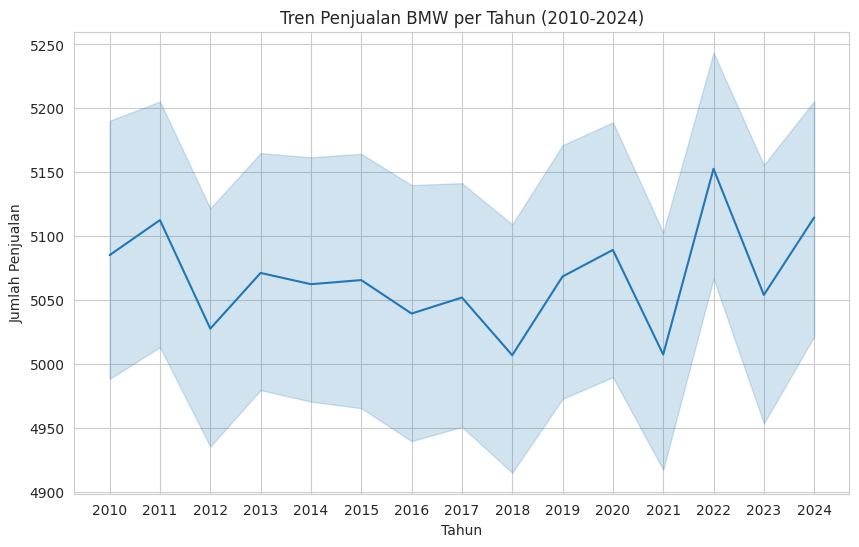

In [ ]:
##Visualisasi data penjualan sales berdasarkan volume penjualan dari tahun 2010 -2024
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Sales_Volume')
plt.title('Tren Penjualan BMW per Tahun (2010-2024)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penjualan')
plt.xticks(df['Year'].unique())
plt.show()


/tmp/ipython-input-1136456856.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_model, x='Model', y='Sales_Volume', palette='Blues_d')


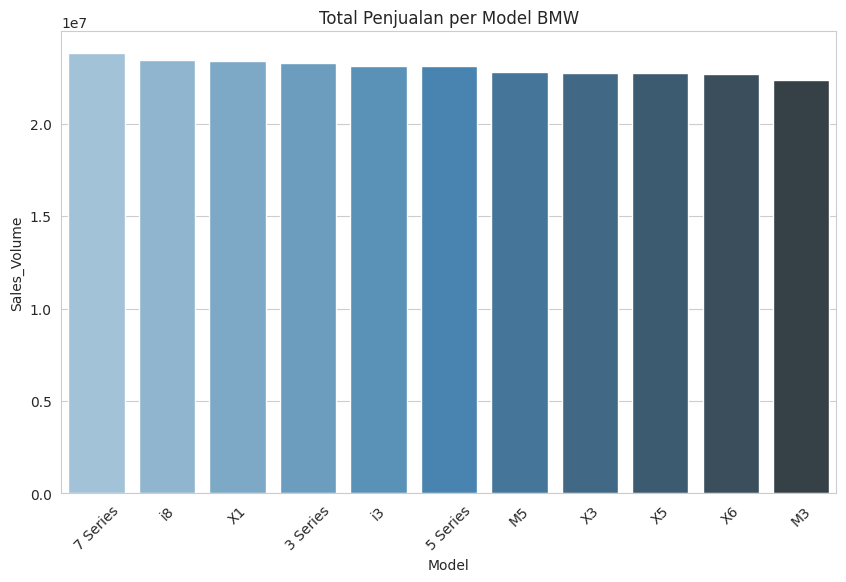

In [ ]:
## Visualisasi penjualan per model
sales_by_model = df.groupby('Model')['Sales_Volume'].sum().reset_index().sort_values(by='Sales_Volume', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_model, x='Model', y='Sales_Volume', palette='Blues_d')
plt.title('Total Penjualan per Model BMW')
plt.xticks(rotation=45)
plt.show()


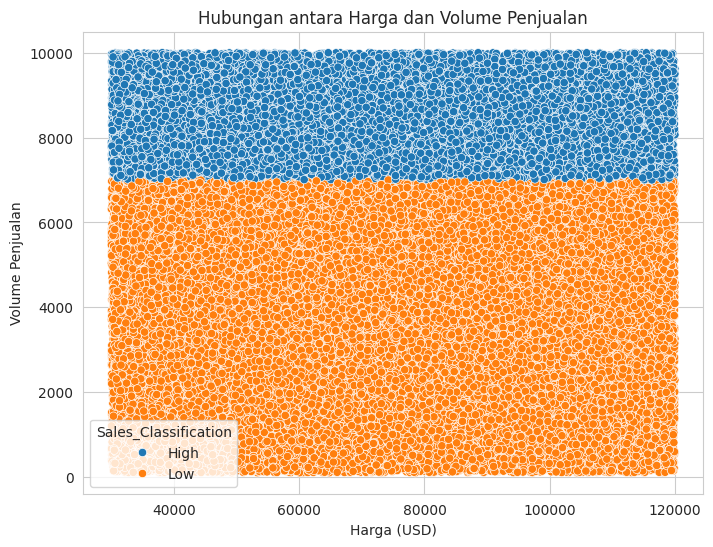

In [ ]:
##Visualisasi hubungan antara harga dan volume penjualan
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Price_USD', y='Sales_Volume', hue='Sales_Classification')
plt.title('Hubungan antara Harga dan Volume Penjualan')
plt.xlabel('Harga (USD)')
plt.ylabel('Volume Penjualan')
plt.show()


/tmp/ipython-input-2394045731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fuel_Type', y='Sales_Volume', palette='Set2')


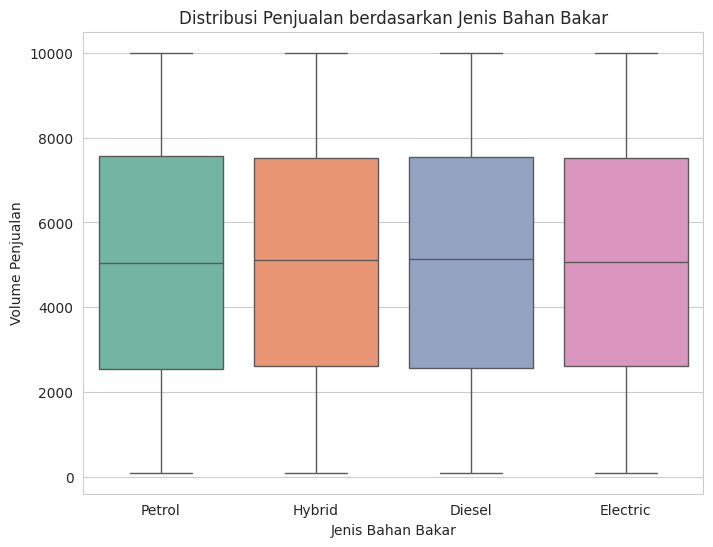

In [ ]:
## Visualisaisi Distribusi berdasarkan Jenis Bahan Bakar
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Fuel_Type', y='Sales_Volume', palette='Set2')
plt.title('Distribusi Penjualan berdasarkan Jenis Bahan Bakar')
plt.xlabel('Jenis Bahan Bakar')
plt.ylabel('Volume Penjualan')
plt.show()



In [ ]:
df['Fuel_Type'].value_counts()


,count
Fuel_Type,
Hybrid,12716
Petrol,12550
Electric,12471
Diesel,12263


In [ ]:
print("""
💡 Analisis Hasil Visualisasi:

1. Tren Penjualan:
   Dari grafik tren, dapat diamati apakah penjualan meningkat, menurun, atau fluktuatif antara tahun 2010 hingga 2024.

2. Model Terlaris:
   Grafik bar menunjukkan model BMW yang paling laku berdasarkan total volume penjualan.

3. Harga vs Penjualan:
   Scatterplot menunjukkan hubungan antara harga mobil dan volume penjualan.
   Biasanya, model dengan harga tinggi memiliki volume lebih rendah — kecuali model flagship tertentu.

4. Jenis Bahan Bakar:
   Boxplot menunjukkan perbandingan distribusi penjualan berdasarkan jenis bahan bakar (Petrol, Diesel, Hybrid, Electric).

""")



💡 Analisis Hasil Visualisasi:

1. Tren Penjualan:
   Dari grafik tren, dapat diamati apakah penjualan meningkat, menurun, atau fluktuatif antara tahun 2010 hingga 2024.

2. Model Terlaris:
   Grafik bar menunjukkan model BMW yang paling laku berdasarkan total volume penjualan.

3. Harga vs Penjualan:
   Scatterplot menunjukkan hubungan antara harga mobil dan volume penjualan.
   Biasanya, model dengan harga tinggi memiliki volume lebih rendah — kecuali model flagship tertentu.

4. Jenis Bahan Bakar:
   Boxplot menunjukkan perbandingan distribusi penjualan berdasarkan jenis bahan bakar (Petrol, Diesel, Hybrid, Electric).


